In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


neha


# DATASET

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")


In [ ]:
data.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048339,97,PAYMENT,17126.04,C900,8476.00,0.00,BGR900,0.00,0.00,0,0
1048340,97,CASH_OUT,141917.76,C901,0.00,0.00,BGR901,10415456.02,10194649.73,0,0
1048341,97,PAYMENT,6624.39,C902,10487.00,3862.61,BGR902,0.00,0.00,0,0
1048342,97,PAYMENT,1194.51,C903,20230.00,19035.49,BGR903,0.00,0.00,0,0
1048343,97,TRANSFER,118404.75,C904,70815.00,0.00,BGR904,28212.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048434,97,PAYMENT,9138.62,C995,21564.00,12425.38,BGR995,0.00,0.00,1,0
1048435,97,PAYMENT,8166.04,C996,22136.00,13969.96,BGR996,0.00,0.00,0,0
1048436,97,PAYMENT,4796.19,C997,20774.00,15977.81,BGR997,0.00,0.00,0,0
1048437,97,PAYMENT,9682.00,C998,15977.81,6295.81,BGR998,0.00,0.00,0,0


In [ ]:
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)

In [ ]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,2,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,2,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,2,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,2,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,5,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
import pandas as pd


# Get the number of rows and columns
num_rows, num_cols = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 1048439
Number of columns: 8


In [ ]:
# Drop columns 'nameOrig', 'nameDest', and 'isFlaggedFraud'
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

Explained Variance Ratio: [0.33079355 0.27516813]


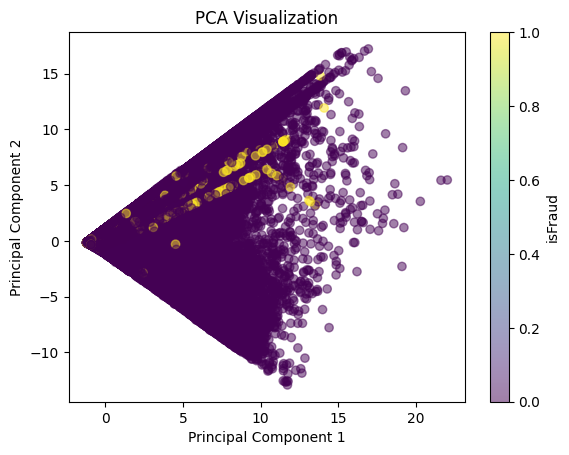

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler


# Drop any rows with missing values
data = data.dropna()

# Separate features from the target variable
X = data.drop('isFraud', axis=1)  # Features
y = data['isFraud']  # Target

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize the reduced-dimensional data (optional)
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='isFraud')
plt.show()


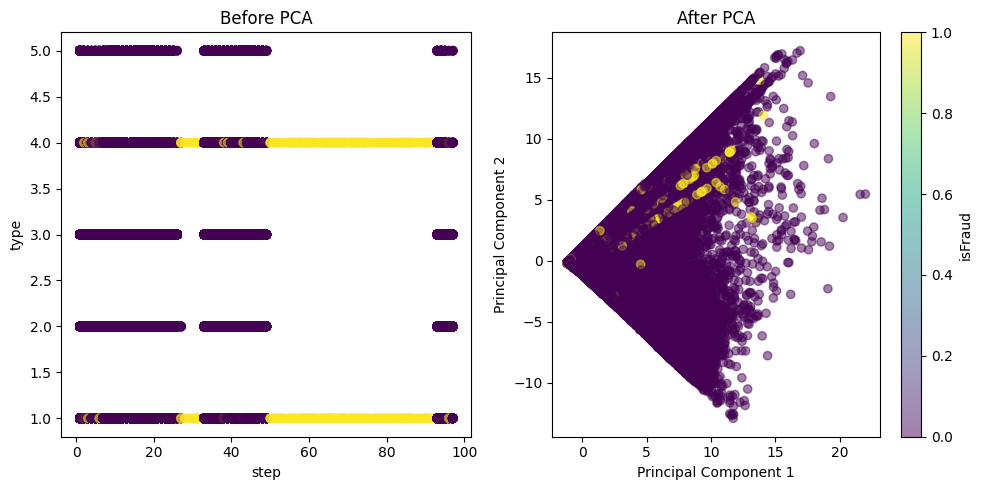

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame containing the dataset
# Drop any rows with missing values
data = data.dropna()

# Separate features from the target variable
X = data.drop('isFraud', axis=1)  # Features
y = data['isFraud']  # Target

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Before PCA Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Before PCA')

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# After PCA Visualization
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA')

plt.colorbar(label='isFraud')
plt.tight_layout()
plt.show()


In [ ]:

# Number of Features Before PCA
num_features_before_pca = X.shape[1]

# Variance of Each Feature Before PCA
variance_before_pca = X.var()

print("Number of Features Before PCA:", num_features_before_pca)
print("\nVariance of Each Feature Before PCA:")
print(variance_before_pca)



Number of Features Before PCA: 7

Variance of Each Feature Before PCA:
step              2.437070e+02
type              9.631826e-01
amount            7.014017e+10
oldbalanceOrg     8.837649e+12
newbalanceOrig    9.056305e+12
oldbalanceDest    5.277748e+12
newbalanceDest    5.844533e+12
dtype: float64


In [ ]:
# Number of Principal Components After PCA
num_components_after_pca = pca.n_components_

# Explained Variance Ratio After PCA
explained_variance_ratio = pca.explained_variance_ratio_

print("\nNumber of Principal Components After PCA:", num_components_after_pca)
print("\nExplained Variance Ratio After PCA:")
print(explained_variance_ratio)




Number of Principal Components After PCA: 2

Explained Variance Ratio After PCA:
[0.33079355 0.27516813]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)
# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Drop any rows with missing values
data = data.dropna()

# Separate features from the target variable
X = data.drop('isFraud', axis=1)   # Features
y = data['isFraud']   # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Train a classifier on the transformed data
# (e.g., logistic regression, support vector machine, etc.)
# For example, let's use Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_lda)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9991320437984053


In [ ]:
data.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)
len(X_train)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['isFraud'])  # Replace 'target_column' with the name of your target column
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)
len(X_train)

838751

In [ ]:
pip install imbalanced-learn

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import pandas as pd

# Load your dataset
# Assuming you have 'data' and 'isFraud' defined
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], value=[2, 4, 1, 5, 3], inplace=True)
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1]
repeated_minority_class_data = pd.concat([minority_class_data] * 10, ignore_index=True)  # Repeat 1000 times based on the support value

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVC model
model = SVC()

# Train SVC model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print classification report
print("Model: Support Vector Classifier")
print(classification_report(y_test, y_pred))




Model: Support Vector Classifier
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    209467
           1       0.97      0.37      0.53      2342

    accuracy                           0.99    211809
   macro avg       0.98      0.68      0.76    211809
weighted avg       0.99      0.99      0.99    211809



In [ ]:
import pandas as pd

# Assuming df is your original DataFrame
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)
# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1]
repeated_minority_class_data= pd.concat([minority_class_data] * 29, ignore_index=True)  # Repeat 29 times based on the support value

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Print the resulting DataFrame
print(repeated_data)


         step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     2    9839.64      170136.00       160296.36            0.00   
1           1     2    1864.28       21249.00        19384.72            0.00   
2           1     2   11668.14       41554.00        29885.86            0.00   
3           1     2    7817.71       53860.00        46042.29            0.00   
4           1     2    7107.77      183195.00       176087.23            0.00   
...       ...   ...        ...            ...             ...             ...   
1081418    97     1  268049.77       30563.12            0.00       286162.34   
1081419    97     2    3136.92       19990.00        16853.08            0.00   
1081420    97     2    6951.07      104432.00        97480.93            0.00   
1081421    97     2    6821.43       11252.00         4430.57            0.00   
1081422    97     2    9138.62       21564.00        12425.38            0.00   

         newbalanceDest  is

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming you have data and isFraud defined

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1]
repeated_minority_class_data = pd.concat([minority_class_data] * 500, ignore_index=True)  # Repeat 29 times based on the support value

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9996455341891441

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209136
           1       1.00      1.00      1.00    118117

    accuracy                           1.00    327253
   macro avg       1.00      1.00      1.00    327253
weighted avg       1.00      1.00      1.00    327253


Confusion Matrix:
[[209020    116]
 [     0 118117]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import pandas as pd

# Load your dataset


data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)
# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)
# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] *200, ignore_index=True)  # Repeat 100 times based on the support value

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = {
    "LightGBM Classifier": lgb.LGBMClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "Naive Bayes Classifier": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Multi-layer Perceptron Classifier": MLPClassifier(),
    "XGBoost Classifier": XGBClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print()


[LightGBM] [Info] Number of positive: 188370, number of negative: 837918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.601179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 1026288, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183545 -> initscore=-1.492512
[LightGBM] [Info] Start training from score -1.492512
Model: LightGBM Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209343
           1       0.99      1.00      1.00     47230

    accuracy                           1.00    256573
   macro avg       1.00      1.00      1.00    256573
weighted avg       1.00      1.00      1.00    256573


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    209343
           1

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'Linear Regression', 'Ridge Regression', 'Lasso Regression', 'LightGBM', 'CatBoost', 'K Neighbours Regression', 'K Neighbours Classifier', 'Elastic Net'],
    'F1 Score': [1,0.96,1.00,0.99,1.00,0.92,1.00,0.98,1.00]
})

plt.figure(figsize=(10, 7))
sns.heatmap(df[['F1 Score']].dropna(), annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Performance Comparison of Different Models (F1 Score)')
plt.show()

ValueError: All arrays must be of the same length

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming you have data and isFraud defined

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1]
repeated_minority_class_data = pd.concat([minority_class_data] * 500, ignore_index=True)  # Repeat 29 times based on the support value

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other evaluation metrics
print("-------Model:Random Forest Classifier :--- --------")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9999847213012563
-------Model:Random Forest Classifier :--- --------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209136
           1       1.00      1.00      1.00    118117

    accuracy                           1.00    327253
   macro avg       1.00      1.00      1.00    327253
weighted avg       1.00      1.00      1.00    327253


Confusion Matrix:
[[209131      5]
 [     0 118117]]


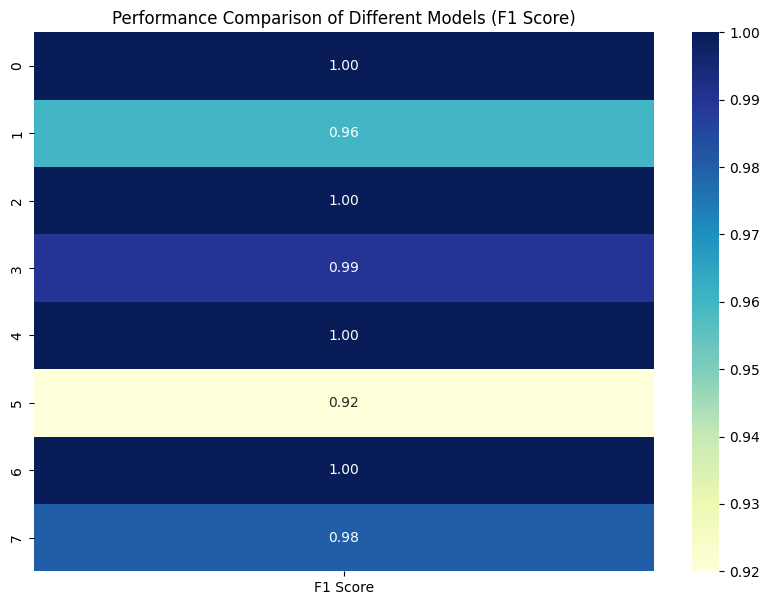

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    'Model': ['LightGBM', 'Logistic Regression', 'Random Forest', 'Gaussian NB', 'KNN', 'Decision Tree', 'MLP', 'XGB'],
    'F1 Score': [1, 0.96, 1.00, 0.99, 1.00, 0.92, 1.00, 0.98]
})

plt.figure(figsize=(10, 7))
sns.heatmap(df[['F1 Score']].dropna(), annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Performance Comparison of Different Models (F1 Score)')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train your model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = model.predict_proba(X_test)[:, 1]

# Get true labels for the test set
y_true = y_test




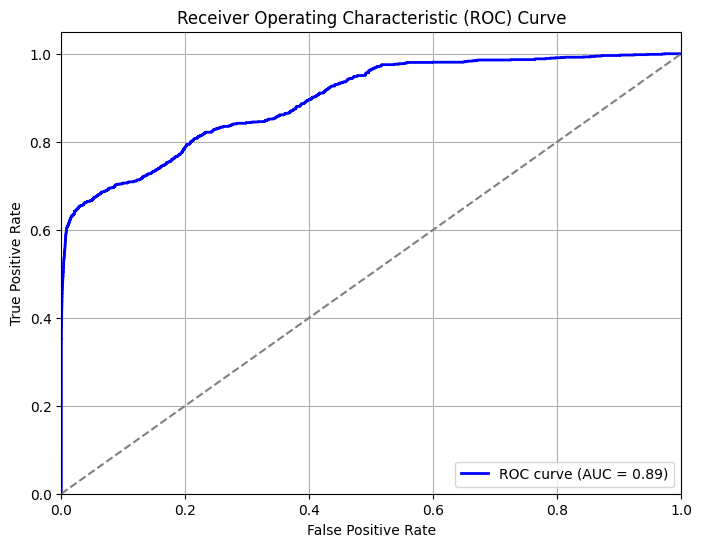

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_true are the true labels and y_scores are the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate AUC score
auc_score = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Define true labels for each model (assuming they are already defined)
y_true_lr = ["Logistic Regression" ]  # True labels for Logistic Regression
y_true_rf = ["Random Forest"]  # True labels for Random Forest
y_true_svm = ["Support Vector Machine"]  # True labels for Support Vector Machine

# Define a list of models and their predicted probabilities
models = [
    ('Logistic Regression', y_true_lr, y_scores_lr),
    ('Random Forest', y_true_rf, y_scores_rf),
    ('Support Vector Machine', y_true_svm, y_scores_svm)
]

# Plot ROC curves and calculate AUC scores for each model
plt.figure(figsize=(8, 6))
for model_name, y_true, y_scores in models:
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_name, auc_score))

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


NameError: name 'y_scores_lr' is not defined